In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

### **Load Dataset**

In [22]:
!git clone https://github.com/allatifatulmuharomiah/Fruit-Ripeness.git

fatal: destination path 'Fruit-Ripeness' already exists and is not an empty directory.


### **Split & Data Augmentation**

In [23]:
root_dir = '/content/Fruit-Ripeness/Fruit-Ripeness/buah sayur'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [24]:
batch_size = 32
train_generator = datagen.flow_from_directory(
    root_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 11320 images belonging to 15 classes.


In [25]:
validation_generator = datagen.flow_from_directory(
    root_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2824 images belonging to 15 classes.


In [26]:
train_classes = train_generator.class_indices
print("Classes in training set:")
for cls, idx in train_classes.items():
    print(f"Class: {cls}, Index: {idx}")

validation_classes = validation_generator.class_indices
print("\nClasses in validation set:")
for cls, idx in validation_classes.items():
    print(f"Class: {cls}, Index: {idx}")


Classes in training set:
Class: Ripe Apple, Index: 0
Class: Ripe_Banana, Index: 1
Class: Ripe_Bell Pepper, Index: 2
Class: Ripe_Orange, Index: 3
Class: Ripe_Strawberry, Index: 4
Class: Ripe_Tomato, Index: 5
Class: Rotten_Apple, Index: 6
Class: Rotten_Banana, Index: 7
Class: Rotten_Orange, Index: 8
Class: Unripe Apple, Index: 9
Class: Unripe_Banana, Index: 10
Class: Unripe_Bell Pepper, Index: 11
Class: Unripe_Orange, Index: 12
Class: Unripe_Strawberry, Index: 13
Class: Unripe_Tomato, Index: 14

Classes in validation set:
Class: Ripe Apple, Index: 0
Class: Ripe_Banana, Index: 1
Class: Ripe_Bell Pepper, Index: 2
Class: Ripe_Orange, Index: 3
Class: Ripe_Strawberry, Index: 4
Class: Ripe_Tomato, Index: 5
Class: Rotten_Apple, Index: 6
Class: Rotten_Banana, Index: 7
Class: Rotten_Orange, Index: 8
Class: Unripe Apple, Index: 9
Class: Unripe_Banana, Index: 10
Class: Unripe_Bell Pepper, Index: 11
Class: Unripe_Orange, Index: 12
Class: Unripe_Strawberry, Index: 13
Class: Unripe_Tomato, Index: 14


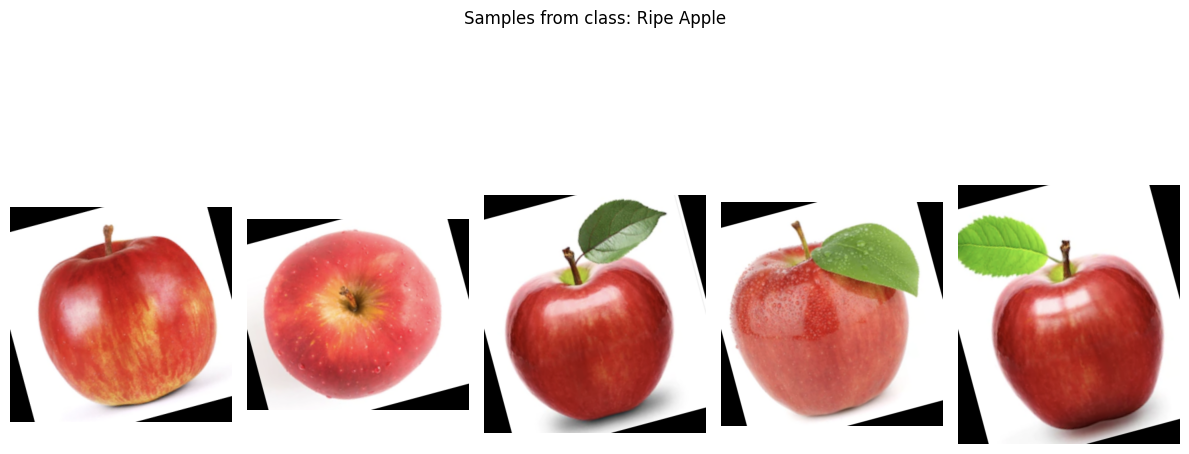

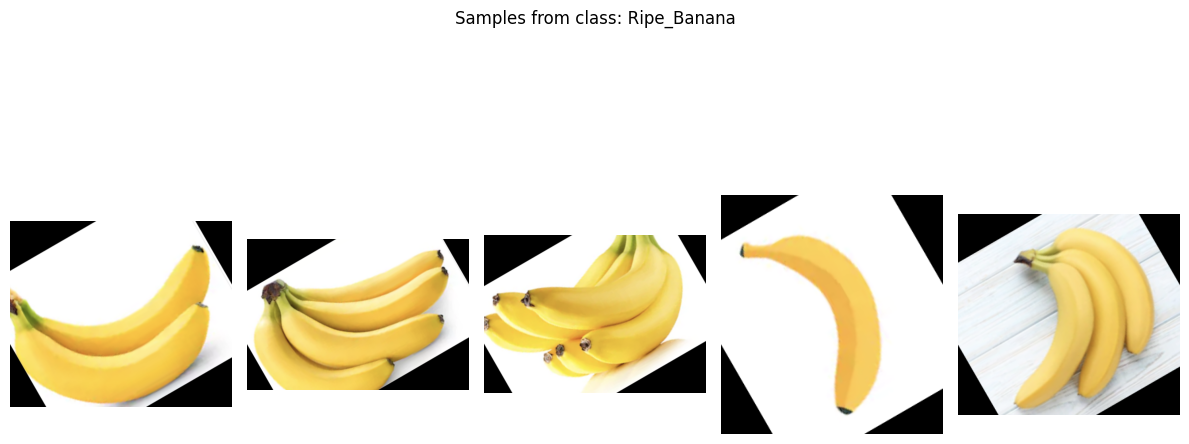

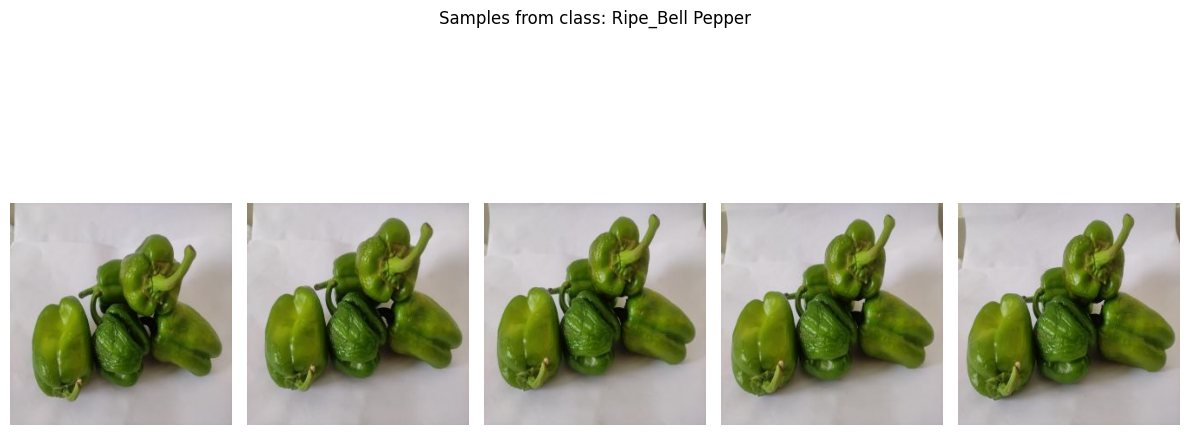

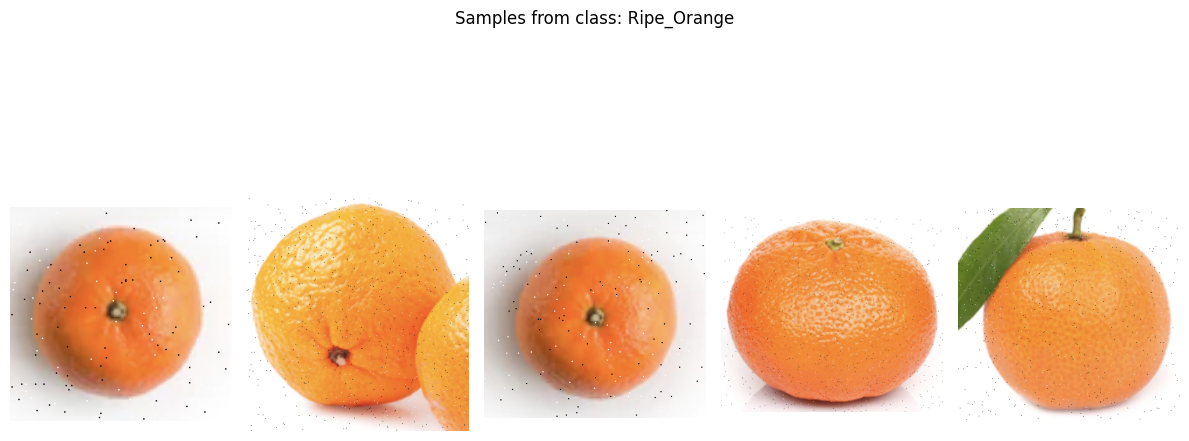

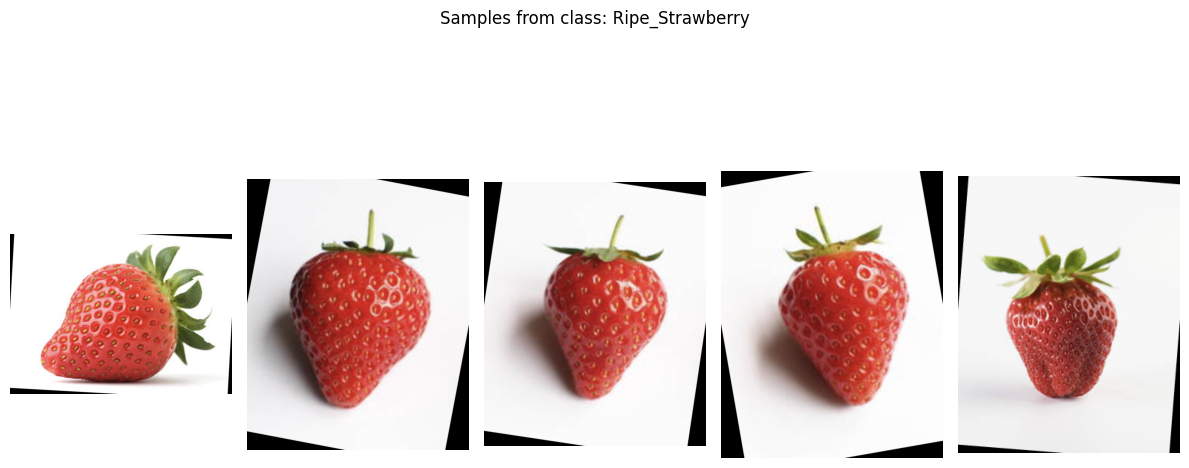

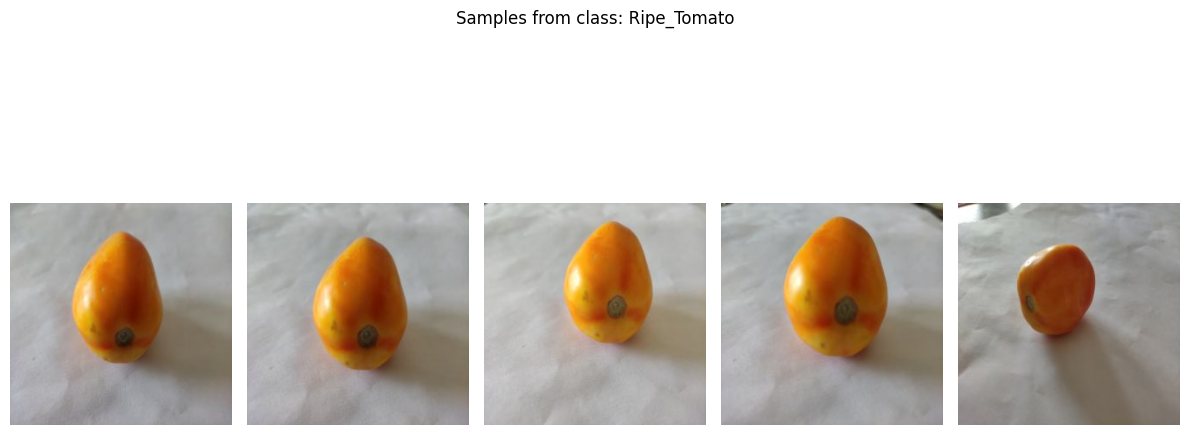

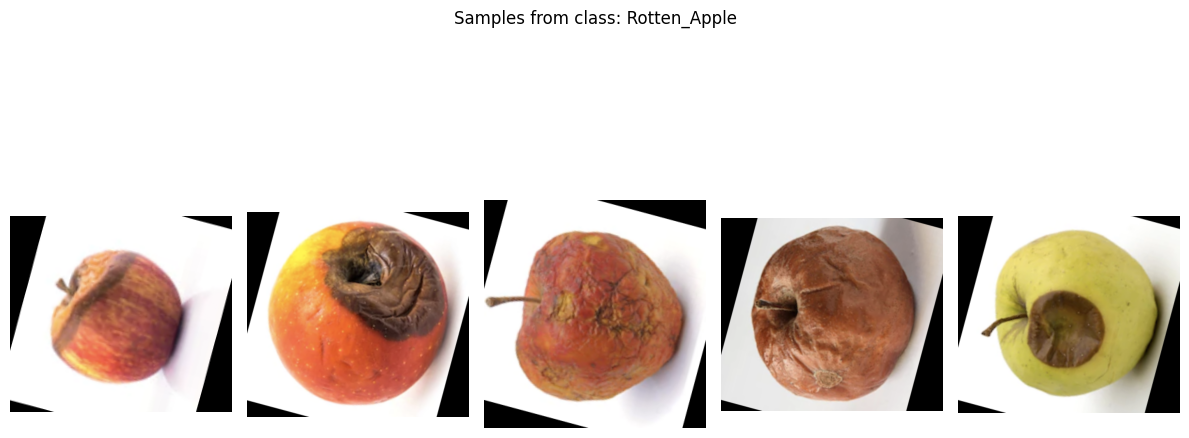

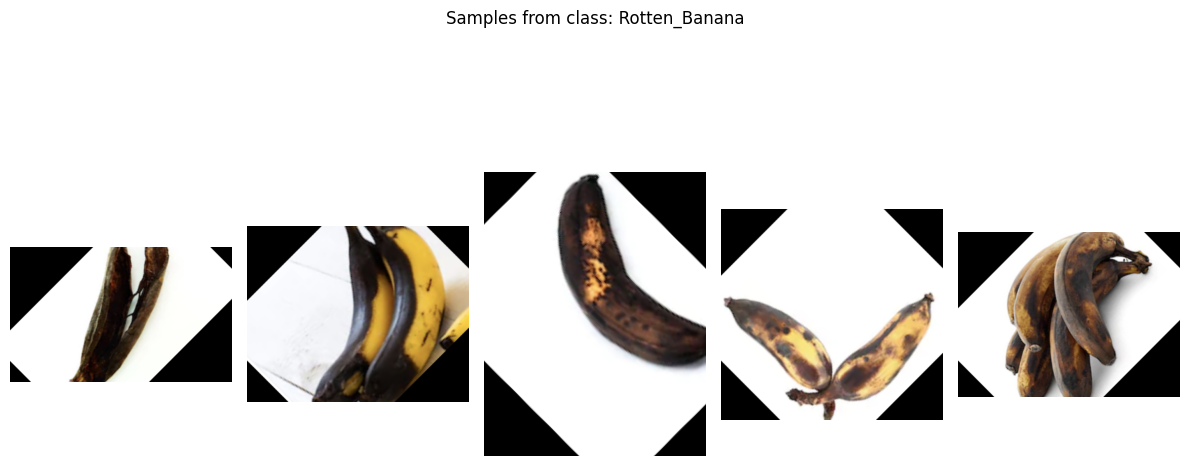

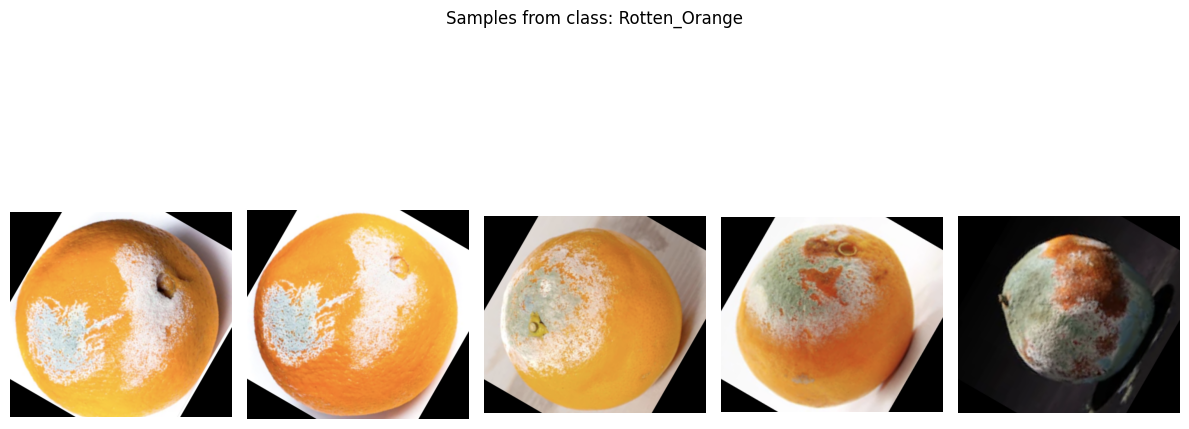

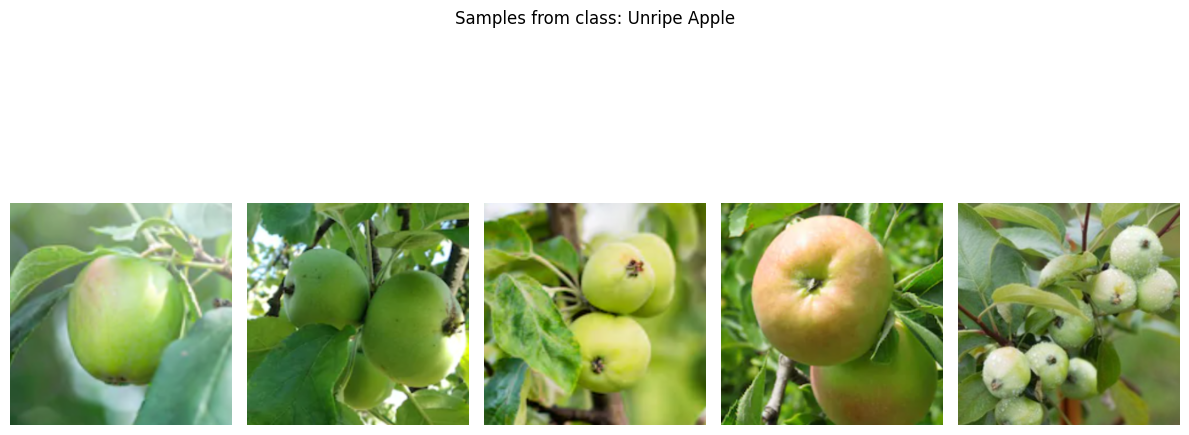

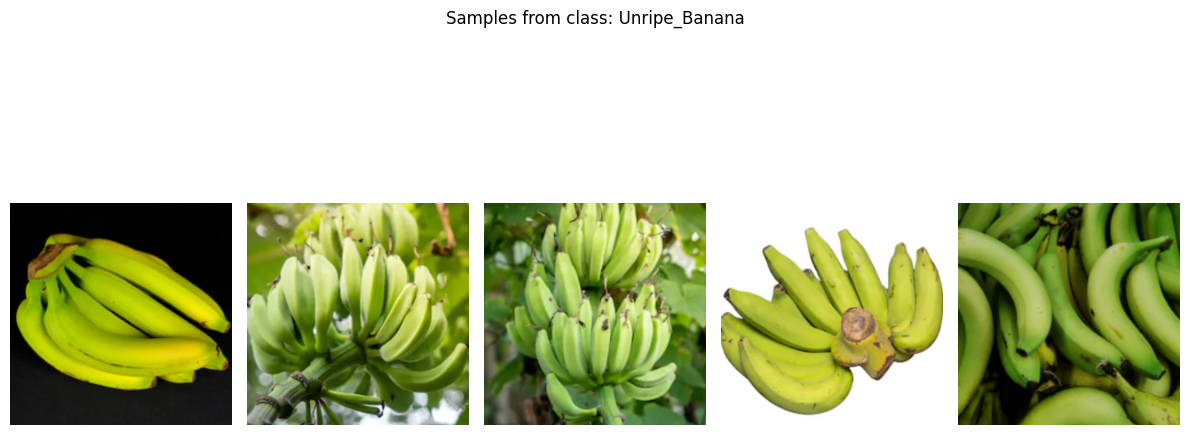

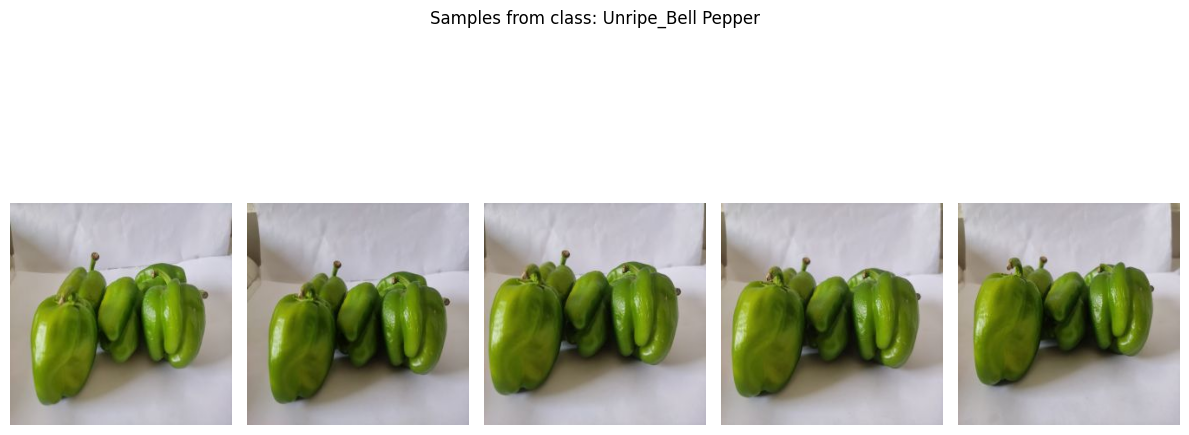

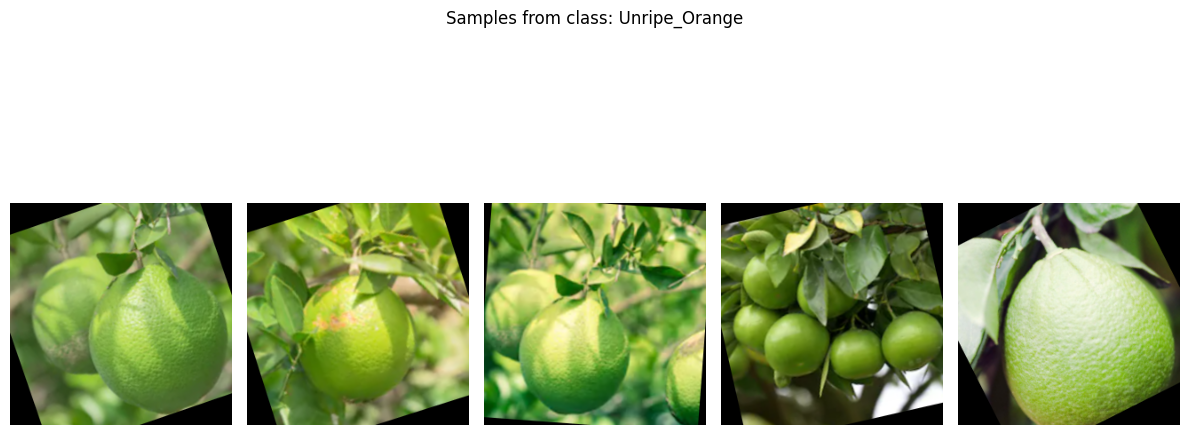

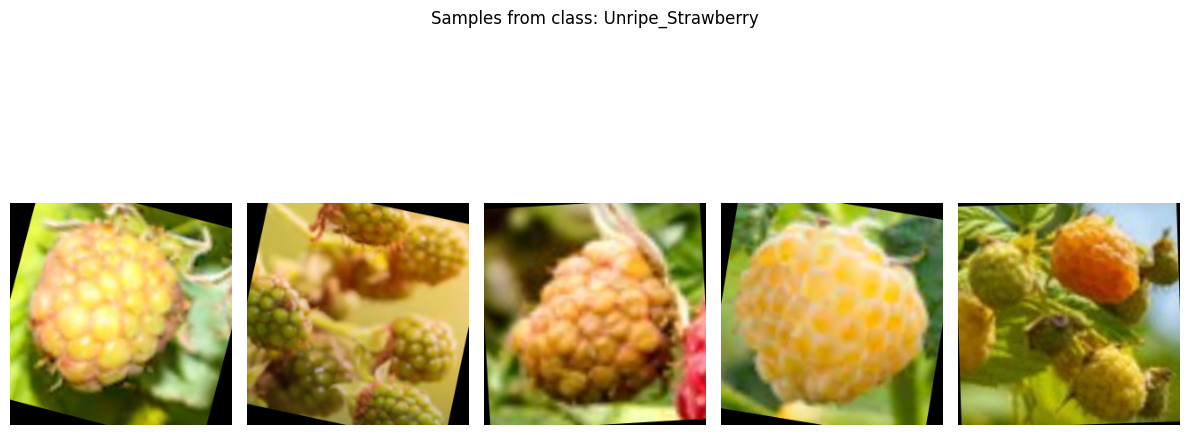

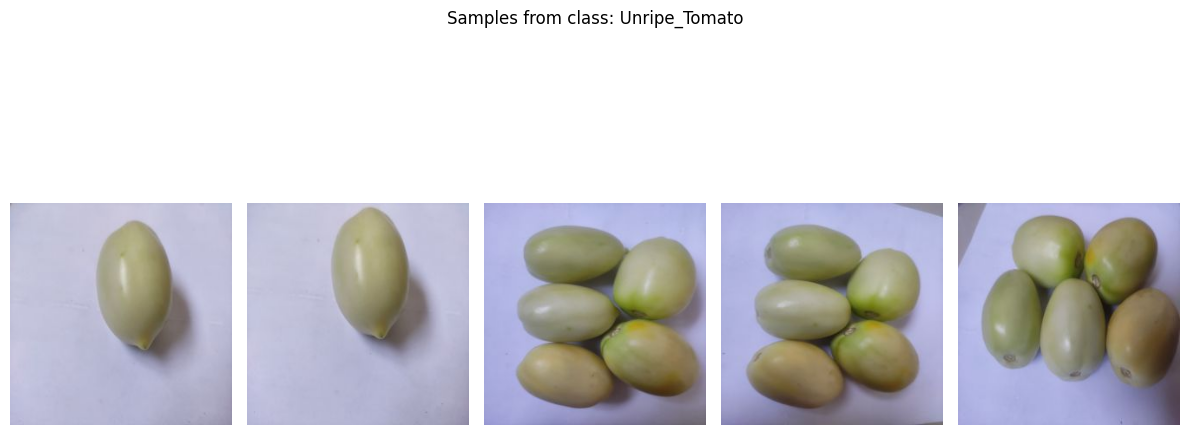

In [27]:
# Mendapatkan kelas-kelas yang ada dalam dataset
classes = list(train_generator.class_indices.keys())

# Mengatur jumlah gambar yang ingin ditampilkan per kelas
num_images_per_class = 5

# Menampilkan lima gambar per kelas
for cls in classes:
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Samples from class: {cls}")

    images_count = 0
    for i, filename in enumerate(train_generator.filenames):
        if filename.split('/')[0] == cls:
            image = plt.imread(train_generator.filepaths[i])
            plt.subplot(1, num_images_per_class, images_count + 1)
            plt.imshow(image)
            plt.axis('off')
            images_count += 1
            if images_count == num_images_per_class:
                break

    plt.tight_layout()
    plt.show()


In [28]:
# Menampilkan jumlah gambar per kelas di training set
train_class_counts = train_generator.classes
num_images_per_class_train = {class_name: sum(train_class_counts == class_idx) for class_name, class_idx in train_generator.class_indices.items()}
print("Number of images per class in training set:")
print(num_images_per_class_train)

# Menampilkan jumlah gambar per kelas di validation set
val_class_counts = validation_generator.classes
num_images_per_class_val = {class_name: sum(val_class_counts == class_idx) for class_name, class_idx in validation_generator.class_indices.items()}
print("\nNumber of images per class in validation set:")
print(num_images_per_class_val)


Number of images per class in training set:
{'Ripe Apple': 1026, 'Ripe_Banana': 1155, 'Ripe_Bell Pepper': 359, 'Ripe_Orange': 409, 'Ripe_Strawberry': 933, 'Ripe_Tomato': 764, 'Rotten_Apple': 794, 'Rotten_Banana': 1320, 'Rotten_Orange': 720, 'Unripe Apple': 1070, 'Unripe_Banana': 1137, 'Unripe_Bell Pepper': 42, 'Unripe_Orange': 553, 'Unripe_Strawberry': 922, 'Unripe_Tomato': 116}

Number of images per class in validation set:
{'Ripe Apple': 256, 'Ripe_Banana': 288, 'Ripe_Bell Pepper': 89, 'Ripe_Orange': 102, 'Ripe_Strawberry': 233, 'Ripe_Tomato': 191, 'Rotten_Apple': 198, 'Rotten_Banana': 329, 'Rotten_Orange': 180, 'Unripe Apple': 267, 'Unripe_Banana': 284, 'Unripe_Bell Pepper': 10, 'Unripe_Orange': 138, 'Unripe_Strawberry': 230, 'Unripe_Tomato': 29}


### **CNN Model**

In [29]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

### **Training**

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
)

Epoch 1/30
353/353 [==============================] - 656s 2s/step - loss: 1.2419 - accuracy: 0.5509 - val_loss: 0.7336 - val_accuracy: 0.7184
Epoch 2/30
353/353 [==============================] - 663s 2s/step - loss: 0.7469 - accuracy: 0.7248 - val_loss: 0.6491 - val_accuracy: 0.7763
Epoch 3/30
353/353 [==============================] - 660s 2s/step - loss: 0.5868 - accuracy: 0.7897 - val_loss: 0.4010 - val_accuracy: 0.8484
Epoch 4/30
353/353 [==============================] - 663s 2s/step - loss: 0.4860 - accuracy: 0.8231 - val_loss: 0.4815 - val_accuracy: 0.8253
Epoch 5/30
353/353 [==============================] - 661s 2s/step - loss: 0.4468 - accuracy: 0.8354 - val_loss: 0.4081 - val_accuracy: 0.8548
Epoch 6/30
353/353 [==============================] - 663s 2s/step - loss: 0.4096 - accuracy: 0.8494 - val_loss: 0.3508 - val_accuracy: 0.8761
Epoch 7/30
353/353 [==============================] - 672s 2s/step - loss: 0.3669 - accuracy: 0.8657 - val_loss: 0.3636 - val_accuracy: 0.8668

In [54]:
model.save('my_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_cnn_model.h5')

# Define the function to predict the image class
def predict_image_class(image_path, train_generator):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_indices = train_generator.class_indices
    inverse_mapping = {v: k for k, v in class_indices.items()}
    predicted_label = inverse_mapping[predicted_class]

    return predicted_label

In [60]:
def predict_and_display_image(model, image_path, train_generator):
    predicted_label = predict_image_class(model, image_path, train_generator)

    # Load and display the image
    img = image.load_img(image_path, target_size=(150, 150))

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_label}")
    plt.show()


1/1 [==============================] - 0s 60ms/step


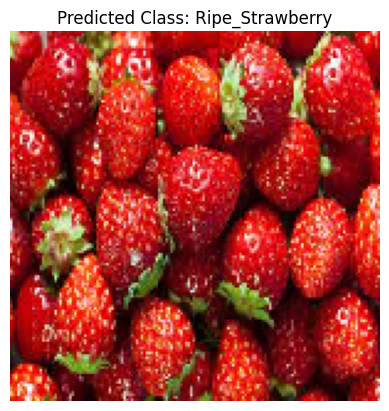

In [44]:
predict_and_display_image(model, '/content/Fruit-Ripeness/Fruit-Ripeness/tes/stoberi.jpg', train_generator)

1/1 [==============================] - 0s 67ms/step


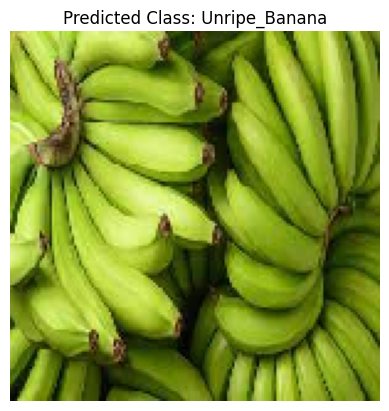

In [47]:
predict_and_display_image(model, '/content/Fruit-Ripeness/Fruit-Ripeness/tes/pisang hijau.jpg', train_generator)